In [2]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных через kagglehub
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

# Загрузка train и test данных
train_data = pd.read_csv(f"{path}/train.csv")
test_data = pd.read_csv(f"{path}/test.csv")

In [3]:
# Выводим информацию о датасете
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Разделение данных на признаки и целевую переменную
X = train_data.drop("price_range", axis=1)
y = train_data["price_range"]

# Разделение на тренировочный и тестовый наборы для оценки модели
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказания на валидационном наборе
y_pred = model.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_val, y_pred))

# Прогнозирование для тестового набора данных
test_predictions = model.predict(test_data.drop("id", axis=1))
test_data["predicted_price_range"] = test_predictions

# Сохранение результатов
test_data[["id", "predicted_price_range"]].to_csv("test_predictions.csv", index=False)
print("Предсказания сохранены в файл test_predictions.csv")

Accuracy: 0.7975
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400

Предсказания сохранены в файл test_predictions.csv


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Построение матрицы ошибок
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Построение распределения реальных и предсказанных классов
def plot_distribution(y_true, y_pred, class_names):
    plt.figure(figsize=(10, 6))
    sns.histplot(y_true, bins=len(class_names), color="blue", label="True", kde=False)
    sns.histplot(y_pred, bins=len(class_names), color="orange", label="Predicted", kde=False, alpha=0.7)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.title("Distribution of True and Predicted Classes")
    plt.legend()
    plt.show()

  # ROC-кривая и AUC
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall кривая
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color="blue")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

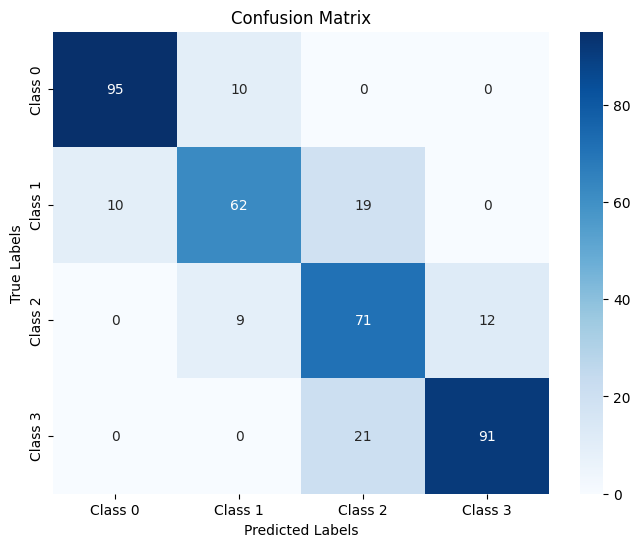

In [11]:
# Получение названий классов
class_names = [f"Class {i}" for i in range(len(set(y)))]

# Матрица ошибок (confusion matrix)
plot_confusion_matrix(y_val, y_pred, class_names)

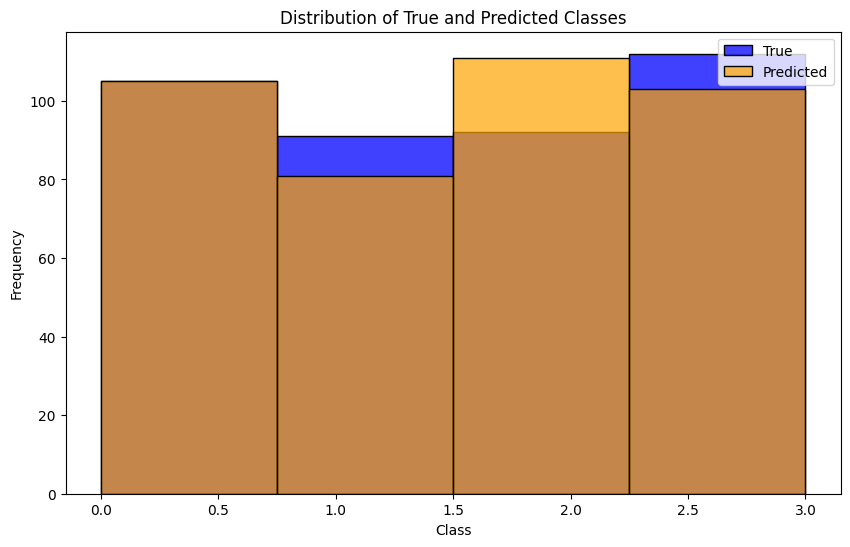

In [8]:
# Распределение целевого признака и предсказаний
plot_distribution(y_val, y_pred, class_names)